In [54]:
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

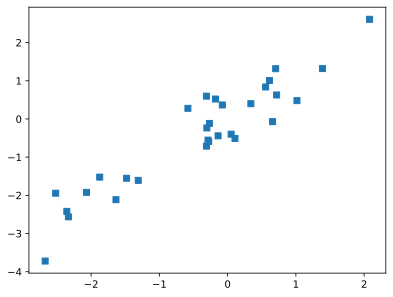

In [55]:
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

plt.plot(x,y,'s')
plt.show()

In [56]:
ANN_reg = nn.Sequential(nn.Linear(1,1),nn.ReLU(),nn.Linear(1,1))
ANN_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [57]:
lr = 0.05
opt = torch.optim.SGD(ANN_reg.parameters(),lr=lr)
loss_fun = nn.MSELoss()


epocs = 100
loss_dict = torch.zeros(epocs)

for e in range(epocs):
    #forward
    yHat = ANN_reg(x)

    #comp loss
    loss = loss_fun(yHat,y)
    loss_dict[e] = loss

    #backprop
    opt.zero_grad()
    loss.backward()
    opt.step()


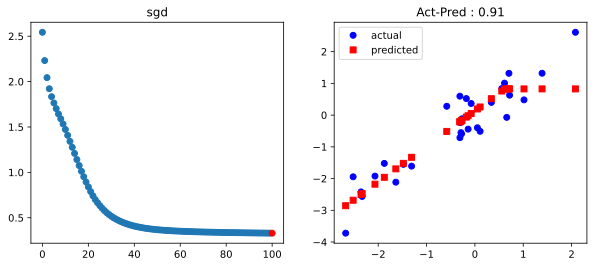

In [58]:
pred = ANN_reg(x)
test_loss = (pred-y).pow(2).mean()

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(loss_dict.detach(),'o')
ax[0].plot(epocs,test_loss.detach(),'ro')
ax[0].set_title('sgd')
ax[1].plot(x,y,'bo')
ax[1].plot(x,pred.detach(),'rs')
ax[1].legend(['actual','predicted'])
plt.title(f'Act-Pred : {np.corrcoef(y.detach().T[0], pred.detach().T[0])[0][1]:.2f}')
plt.show()

In [61]:
def model_ann(x,y,lr,optm,loss_fun,epocs = 100,plot=True):
    
    loss_dict = torch.zeros(epocs)
    mdl_ann = nn.Sequential(nn.Linear(1,1),
                            nn.ReLU(),
                            nn.Linear(1,1))
    
    opt = optm(mdl_ann.parameters(),lr=lr)

    for e in range(epocs):
        #forward
        yHat = mdl_ann(x)
        #comp loss
        loss = loss_fun(yHat,y)
        loss_dict[e] = loss
        #backprop
        opt.zero_grad()
        loss.backward()
        opt.step()
    
    y_pred = mdl_ann(x)
    model_loss = (y_pred-y).pow(2).mean()
    acc = np.corrcoef(y.detach().T[0], y_pred.detach().T[0])[0][1]

    if plot:
        fig,ax = plt.subplots(1,2,figsize=(10,4))
        ax[0].plot(loss_dict.detach(),'o')
        ax[0].plot(epocs,model_loss.detach(),'ro')
        ax[0].set_title('sgd')
        ax[1].plot(x,y,'bo')
        ax[1].plot(x,y_pred.detach(),'rs')
        ax[1].legend(['actual','predicted'])
        plt.title(f'Act-Pred : {acc:.2f}')
        plt.show()
        
    return loss_dict[-1], acc


In [102]:
def get_data(m,N=50):
    return torch.randn(N,1),  m*x + torch.randn(N,1)/2

it = 50
slope = torch.linspace(-2,2,21)
fianl_mat = torch.zeros(len(slope),it,2)

for m in range(len(slope)):
    for i in range(it):
        x,y = get_data(slope[m],N)
        l,a = model_ann(x,y,lr=0.01,optm=torch.optim.SGD,loss_fun=nn.MSELoss(),epocs=500,plot=False)
        fianl_mat[m,i,0]= l.item()
        fianl_mat[m,i,1]= a.item()

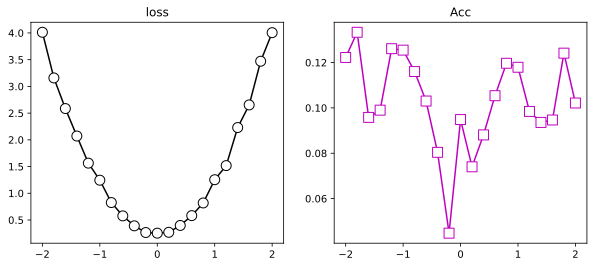

In [103]:
fianl_mat[torch.isnan(fianl_mat)] = 0

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(slope,torch.mean(fianl_mat[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_title('loss')
ax[1].plot(slope,torch.mean(fianl_mat[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_title('Acc')
plt.show()

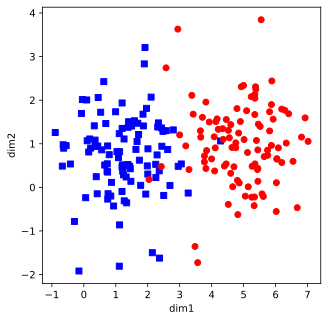

In [179]:
#classification 

dpc = 100
blur = 1

#genrating random data with 2 labels a & b with 2 features 
A = [1,1]
B = [5,1]

a = [A[0]+np.random.randn(dpc)*blur, A[1]+np.random.randn(dpc)*blur]
b = [B[0]+np.random.randn(dpc)*blur, B[1]+np.random.randn(dpc)*blur]

data_ = np.hstack((a,b)).T
labels_ = np.vstack((np.zeros((dpc,1)),np.ones((dpc,1)))) 

data = torch.Tensor(data_)
labels = torch.Tensor(labels_)

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ro')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.show()

In [180]:
Ann_clsf = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid())

Ann_clsf

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [219]:
lr = 0.02
epocs = 10000
l_fn = nn.BCELoss()
opt = torch.optim.SGD(Ann_clsf.parameters(),lr=lr)

losses = torch.zeros(epocs)

for i in range(epocs):

    #feed forwards
    yHat = Ann_clsf(data)

    #loss
    loss = l_fn(yHat,labels)
    losses[i] =loss

    #backprop
    opt.zero_grad()
    loss.backward()
    opt.step()

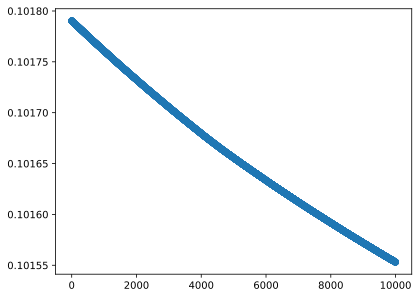

In [220]:
plt.plot(losses.detach(),'o')
plt.show()

In [223]:
y_pred = Ann_clsf(data)
y_pred_trans = y_pred>.5

tr_neg = np.where(y_pred_trans!=labels)[0]

acc = 100 - 100*(len(tr_neg)/(2*dpc))
acc

97.0

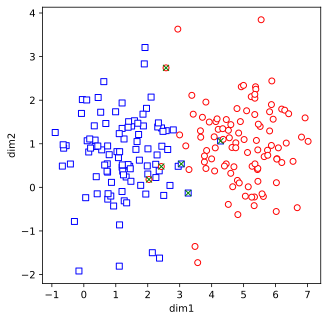

In [235]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',markerfacecolor='w')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ro',markerfacecolor='w')
plt.plot(data[tr_neg][:,0],data[tr_neg][:,1],'gx')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.show()